In [29]:
import pandas as pd
data=pd.read_pickle('saved/normalized_data')

In [30]:
weights=[8,16,4,8,2,2,-5,4]
w=pd.Series(weights)
print(w.shape[0])
data.head()

8


,Summary,Precip Type,Temperature Gradient,Humidity,Wind Speed,Wind Bearing Gradient,Visibility,Pressure
0,4,1.0,0.460490,0.86,0.223399,0.511142,0.983,0.970613
1,8,1.0,0.462978,0.89,0.061523,0.423398,0.929,0.970909
2,4,1.0,0.443073,0.83,0.220877,0.590529,0.983,0.971358
3,8,1.0,0.470939,0.83,0.172970,0.486072,0.983,0.971454
4,4,1.0,0.470939,0.85,0.218608,0.498607,0.929,0.971597


In [31]:
df_new = data* w.values
df_new.head(10)

,Summary,Precip Type,Temperature Gradient,Humidity,Wind Speed,Wind Bearing Gradient,Visibility,Pressure
0,32,16.0,1.841959,6.88,0.446798,1.022284,-4.915,3.882452
1,64,16.0,1.851911,7.12,0.123046,0.846797,-4.645,3.883637
2,32,16.0,1.772293,6.64,0.441755,1.181058,-4.915,3.885434
3,64,16.0,1.883758,6.64,0.345940,0.972145,-4.915,3.885816
4,32,16.0,1.883758,6.80,0.437216,0.997214,-4.645,3.886389
5,32,16.0,1.743631,7.60,0.387292,1.002786,-3.100,3.886619
6,32,16.0,1.924761,7.12,0.443268,1.002786,-3.100,3.887077
7,32,16.0,1.997213,6.56,0.354513,0.997214,-3.100,3.889103
8,32,16.0,2.061704,5.76,0.392335,1.055710,-3.100,3.888530
9,32,16.0,2.011146,5.36,0.550177,1.030641,-3.480,3.889295


In [4]:
df_new.to_pickle('saved/new_dataframe')

In [5]:
#snow_data=df_new[data['Precip Type'] == -1]
#snow_data.head(10)
#snow_data.loc[:,'Precip Type'].replace(-50.0,50.0,inplace=True)

In [6]:
df_new.loc[:,'Precip Type'].replace(-50.0,100.0,inplace=True)

In [7]:
df_new.head(10)

,Summary,Precip Type,Temperature Gradient,Humidity,Wind Speed,Wind Bearing Gradient,Visibility,Pressure
0,32,16.0,1.841959,6.88,0.446798,1.022284,-4.915,3.882452
1,64,16.0,1.851911,7.12,0.123046,0.846797,-4.645,3.883637
2,32,16.0,1.772293,6.64,0.441755,1.181058,-4.915,3.885434
3,64,16.0,1.883758,6.64,0.345940,0.972145,-4.915,3.885816
4,32,16.0,1.883758,6.80,0.437216,0.997214,-4.645,3.886389
5,32,16.0,1.743631,7.60,0.387292,1.002786,-3.100,3.886619
6,32,16.0,1.924761,7.12,0.443268,1.002786,-3.100,3.887077
7,32,16.0,1.997213,6.56,0.354513,0.997214,-3.100,3.889103
8,32,16.0,2.061704,5.76,0.392335,1.055710,-3.100,3.888530
9,32,16.0,2.011146,5.36,0.550177,1.030641,-3.480,3.889295


In [8]:
df_new['Sum']=df_new.sum(axis=1)
df_new.head()

,Summary,Precip Type,Temperature Gradient,Humidity,Wind Speed,Wind Bearing Gradient,Visibility,Pressure,Sum
0,32,16.0,1.841959,6.88,0.446798,1.022284,-4.915,3.882452,57.158492
1,64,16.0,1.851911,7.12,0.123046,0.846797,-4.645,3.883637,89.180390
2,32,16.0,1.772293,6.64,0.441755,1.181058,-4.915,3.885434,57.005540
3,64,16.0,1.883758,6.64,0.345940,0.972145,-4.915,3.885816,88.812659
4,32,16.0,1.883758,6.80,0.437216,0.997214,-4.645,3.886389,57.359578


In [9]:
df_new.loc[df_new.Sum>65.337,'Prediction']=1
df_new.loc[df_new.Sum<65.337,'Prediction']=0
data = df_new.drop(['Sum'],axis=1,inplace=True)
y_pred=df_new['Prediction']
data = df_new.drop(['Prediction'],axis=1)
data.head()

,Summary,Precip Type,Temperature Gradient,Humidity,Wind Speed,Wind Bearing Gradient,Visibility,Pressure
0,32,16.0,1.841959,6.88,0.446798,1.022284,-4.915,3.882452
1,64,16.0,1.851911,7.12,0.123046,0.846797,-4.645,3.883637
2,32,16.0,1.772293,6.64,0.441755,1.181058,-4.915,3.885434
3,64,16.0,1.883758,6.64,0.345940,0.972145,-4.915,3.885816
4,32,16.0,1.883758,6.80,0.437216,0.997214,-4.645,3.886389


In [10]:
y_pred.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Prediction, dtype: float64

# Training the Model

### y_pred = final prediction
### data =  features

In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential()

In [13]:
model.add(Dense(32,activation = 'relu',input_dim=8))
model.add(Dense(units = 16,activation = 'relu'))
model.add(Dense(units = 16,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics= ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(data,y_pred,test_size=0.4,random_state = 0)

In [15]:
print(xtrain.shape)
print(xtest.shape)

(57871, 8)
(38581, 8)


In [16]:
data.head()

,Summary,Precip Type,Temperature Gradient,Humidity,Wind Speed,Wind Bearing Gradient,Visibility,Pressure
0,32,16.0,1.841959,6.88,0.446798,1.022284,-4.915,3.882452
1,64,16.0,1.851911,7.12,0.123046,0.846797,-4.645,3.883637
2,32,16.0,1.772293,6.64,0.441755,1.181058,-4.915,3.885434
3,64,16.0,1.883758,6.64,0.345940,0.972145,-4.915,3.885816
4,32,16.0,1.883758,6.80,0.437216,0.997214,-4.645,3.886389


In [17]:
model.fit(xtrain,ytrain,epochs=4,batch_size = 10000,validation_data = (xtest,ytest))

Instructions for updating:
Use tf.cast instead.
Train on 57871 samples, validate on 38581 samples
Epoch 1/4
57871/57871 [==============================] - 0s 7us/step - loss: 3.0015 - acc: 0.7204 - val_loss: 2.0079 - val_acc: 0.7251
Epoch 2/4
57871/57871 [==============================] - 0s 2us/step - loss: 1.4887 - acc: 0.7204 - val_loss: 0.9177 - val_acc: 0.7251
Epoch 3/4
57871/57871 [==============================] - 0s 2us/step - loss: 0.7048 - acc: 0.7204 - val_loss: 0.4283 - val_acc: 0.7251
Epoch 4/4
57871/57871 [==============================] - 0s 2us/step - loss: 0.3684 - acc: 0.8471 - val_loss: 0.2961 - val_acc: 0.9985


In [18]:
predictions = model.predict(xtest)
score = model.evaluate(xtest,ytest)

38581/38581 [==============================] - 1s 14us/step


In [19]:
print(score)
model_json=model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

[0.2960979755989967, 0.9985225888390659]
Saved model to disk


In [20]:
# load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
#print(loaded_model_json)

Loaded model from disk


In [21]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(xtest, ytest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 99.85%


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier   
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelPropagation

classifiers=[
    
    (LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=100.0, fit_intercept=True,
    intercept_scaling=10, class_weight=None, random_state=None, solver='warn', max_iter=10,
    multi_class='warn', verbose=0, warm_start=False, n_jobs=None),"Logistic Regression"),
    
    
    (KNeighborsClassifier(1),"K Nearest Classifier "),
    
    (SVC(C=50.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),'Support Vector Machine Classifier'),
    
    (QuadraticDiscriminantAnalysis(),'Qudratic Discriminant Analysis'),
    
    (RandomForestClassifier(max_depth=50, n_estimators=10, max_features=1),'Random Forest Classifier'),
    
    (AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.01,
                        algorithm='SAMME.R', random_state=None),'Adaboost Classifier'),
    (SGDClassifier(),'SGD Classifier'),
    
    (DecisionTreeClassifier(max_depth=5),'Decision Tree Classifier'),
    (xgboost.XGBClassifier(learning_rate=0.1),'XG Boost Classifier'),
    
    (LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, 
        store_covariance=False,tol=0.00001),'Linear Discriminant Analysis'),
     
    (GaussianNB(),'Gaussian Naive Bayes ')
]

In [23]:
score=[];names=[]
from sklearn.metrics import accuracy_score
for model_inp,name in classifiers:
    clf=model_inp.fit(xtrain,ytrain)
    y_pred=clf.predict(xtest)
    score.append(accuracy_score(y_pred,ytest))

/home/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/abhinav/anaconda3/lib/python3.7/site

In [24]:
print(score)

[0.9997926440475882, 1.0, 1.0, 0.2748762344159042, 0.9999740805059485, 1.0, 1.0, 1.0, 1.0, 0.9794717607112309, 0.9967600632435655]


In [25]:
for i in range(len(score)):
    score[i]=score[i]*100
print(score)

[99.97926440475882, 100.0, 100.0, 27.48762344159042, 99.99740805059486, 100.0, 100.0, 100.0, 100.0, 97.94717607112308, 99.67600632435655]


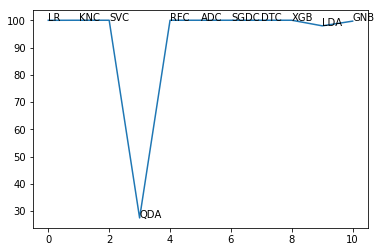

In [28]:
names=['LR','KNC','SVC','QDA','RFC','ADC','SGDC','DTC','XGB','LDA','GNB']
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
A = score[:]
plt.plot(A)
for i, label in enumerate(names):
    plt.text(i,A[i], label)
plt.show()

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________
